### K-Means Clustering

**Real-World Scenario: Customer Segmentation with K-Means Clustering**
We'll use a sample dataset with 100 customers, each represented by their annual income and spending score. We'll apply K-Means Clustering to segment these customers into distinct groups.

#### Step 1: Import Libraries

First, we import the necessary libraries:

- **numpy** and **pandas** for data manipulation.
- **matplotlib** for visualization.
- **KMeans** from sklearn for the clustering algorithm.
- **StandardScaler** for data standardization.
- **silhouette_score** for evaluating the clustering.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#### Step 2: Generate Sample Dataset

We create a dataset with 100 data points representing annual income and spending score:

In [3]:
# Generating a sample dataset
np.random.seed(42)
annual_income = np.random.randint(15, 100, 100)
spending_score = np.random.randint(1, 100, 100)
data = pd.DataFrame({'Annual Income': annual_income, 'Spending Score': spending_score})

# Display the first few rows of the dataset
data.head()

,Annual Income,Spending Score
0,66,35
1,29,33
2,86,5
3,75,41
4,35,28


#### Step 3: Preprocess Data

Standardize the data to have a mean of 0 and standard deviation of 1:

Standardization ensures that all features contribute equally to the distance calculations.

In [4]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
# Display the first few rows of the scaled data
pd.DataFrame(data_scaled, columns=data.columns).head()

,Annual Income,Spending Score
0,0.365968,-0.473198
1,-1.071487,-0.541579
2,1.142972,-1.498916
3,0.715620,-0.268054
4,-0.838386,-0.712532


#### Step 4: Determine the Optimal Number of Clusters

We use the Elbow Method and Silhouette Score to determine the optimal number of clusters.

**Elbow Method:**

The Elbow Method helps us identify the point where adding more clusters doesn’t significantly improve the within-cluster sum of squares (WCSS).

In [9]:
# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

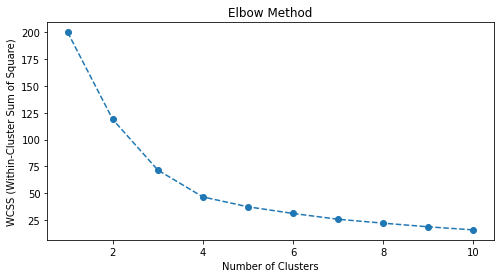

In [10]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.show()

**Silhouette Score:**

The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.

In [11]:
# Using the Silhouette Score to find the optimal number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

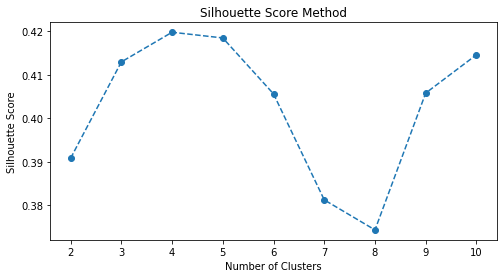

In [12]:
# Plotting the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### Step 5: Apply K-Means Clustering

Based on the Elbow Method and Silhouette Score, we assume the optimal number of clusters is 4:

In [13]:
# Applying K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=42)

In [15]:
# Adding the cluster labels to the original data
data['Cluster'] = kmeans.labels_
data['Cluster'].value_counts()

2    34
3    26
0    22
1    18
Name: Cluster, dtype: int64

In [48]:
# Display the first few rows of the data with cluster labels
data.head()

,Annual Income,Spending Score,Cluster
0,66,35,2
1,29,33,1
2,86,5,2
3,75,41,2
4,35,28,1


In [16]:
# Inverse transform the centroids to original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

#### Step 6: Visualize the Clusters

Visualize the clusters along with their centroids:

Each cluster is represented with a different color, and the centroids are marked with a red 'X'.

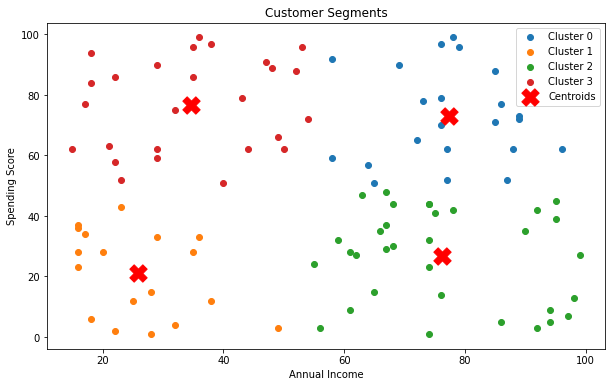

In [17]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
for cluster in range(4):
    clustered_data = data[data['Cluster'] == cluster]
    plt.scatter(clustered_data['Annual Income'], clustered_data['Spending Score'], label=f'Cluster {cluster}')
    
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

#### Step 7: Evaluate the Model

Finally, calculate and print the Silhouette Score to evaluate the clustering:

In [51]:
# Calculating the Silhouette Score
score = silhouette_score(data_scaled, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.41975298308526


This comprehensive guide provides a clear understanding of how to perform K-Means Clustering, from generating a sample dataset to evaluating the model's performance using the Silhouette Score.